In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

path_to_depth = '../nyu_depth_v2_labeled.mat'

# read mat file
f = h5py.File(path_to_depth)

0
1449
(1449, 480, 640, 4)


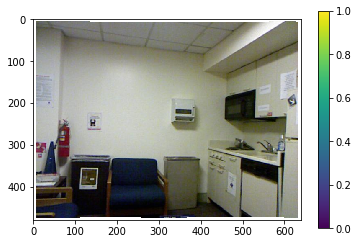

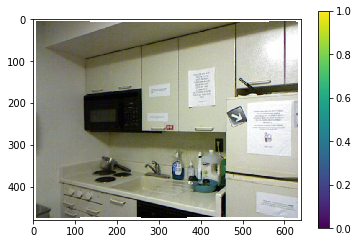

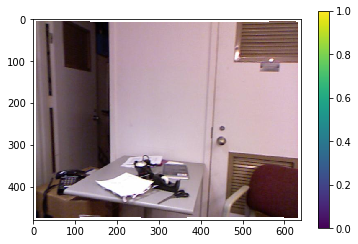

In [25]:
batch_size=len(f['depths'])

imgs = np.zeros((batch_size,480,640,4))
# gt = np.zeros((batch_size,480,640,1))    
for i in range(10):#len(f['depths'])):

    # read 0-th image. original format is [3 x 640 x 480], uint8
    img = f['images'][i]
    depth = f['depths'][i]

    # reshape
    img_ = np.empty([480, 640, 4])
    img_[:,:,0] = img[0,:,:].T/255
    img_[:,:,1] = img[1,:,:].T/255
    img_[:,:,2] = img[2,:,:].T/255
    img_[:,:,3] = depth[:,:].T

    imgs[i,:,:,:] = img_ 
    if i % 100 == 0:
    	print(i)
# return pred, gt
print(len(f['depths']))
print(imgs.shape)
# pred = pred.astype(int)
# # gt = gt.astype(int)

for i in range(3):
    plt.figure()
    plt.imshow(imgs[i,:,:,:3])
    plt.colorbar()
plt.show()

In [28]:
for fff in f.keys():
    print(fff)

#refs#
#subsystem#
accelData
depths
images
instances
labels
names
namesToIds
rawDepthFilenames
rawDepths
rawRgbFilenames
sceneTypes
scenes


In [ ]:
batch_size=len(f['depths'])

imgs = np.zeros((batch_size,480,640,4))
# gt = np.zeros((batch_size,480,640,1))    
for i in range(len(f['depths'])):

    # read 0-th image. original format is [3 x 640 x 480], uint8
    img = f['images'][i]
    depth = f['labels'][i]

    # reshape
    img_ = np.empty([480, 640, 4])
    img_[:,:,0] = img[0,:,:].T/255
    img_[:,:,1] = img[1,:,:].T/255
    img_[:,:,2] = img[2,:,:].T/255
    img_[:,:,3] = depth[:,:].T

    imgs[i,:,:,:] = img_ 
    if i % 100 == 0:
    	print(i)
# return pred, gt
print(len(f['depths']))
print(imgs.shape)
# pred = pred.astype(int)
# # gt = gt.astype(int)

for i in range(3):
    plt.figure()
    plt.imshow(imgs[i,:,:,-1])
    plt.colorbar()
plt.show()

0
100
200
300
400
500


In [280]:
a = imgs[0,:,:,-1]
b = imgs[1,:,:,-1]

In [292]:
def ABO(a, b):
    total = []
    no_use = set()
    for label1 in range(20, 25): #int(np.max(b))):
        best_overlap = 0
        for label2 in range(int(np.max(a))):
            if label2 in no_use: continue
            eq = np.logical_and(a==label2, b==label1)
            union = np.logical_or(a==label2, b==label1)
            overlap = np.sum(eq) / np.sum(union)
            best_overlap = max(best_overlap, overlap)
    #         if overlap == best_overlap and overlap > .1:
    #             no_use.add(label2)
        total.append(best_overlap)
    return np.sum(total)

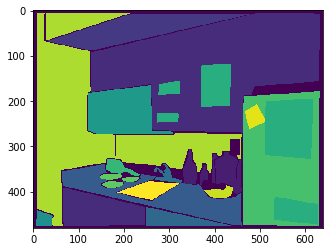

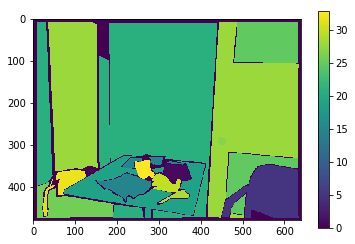

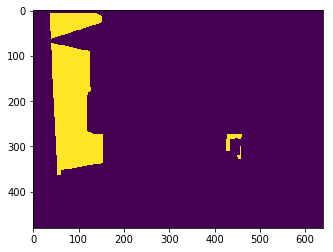